In [35]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [150]:
my_data = pd.read_csv("S11buffandnerf.csv", delimiter=",")

my_data = my_data.replace(regex={'buff': 2, 'nerf': 4})
my_data[0:5]

,champ,role,pickrate,winrate,banrate,rank,change
0,Azir,MID,0.93,43.88,0.16,irontogold,2
1,Elise,JUNGLE,3.91,50.23,8.17,irontogold,4
2,Ezreal,ADC,16.38,47.11,3.43,irontogold,2
3,Graves,JUNGLE,3.02,46.09,1.53,irontogold,2
4,Hecarim,JUNGLE,2.65,46.14,4.88,irontogold,2


In [151]:
X = my_data[[ 'winrate','rank','banrate','pickrate']].values
X[0:5]

array([[43.88, 'irontogold', 0.16, 0.93],
       [50.23, 'irontogold', 8.17, 3.91],
       [47.11, 'irontogold', 3.43, 16.38],
       [46.09, 'irontogold', 1.53, 3.02],
       [46.14, 'irontogold', 4.88, 2.65]], dtype=object)

In [152]:
from sklearn import preprocessing
le_champ = preprocessing.LabelEncoder()
le_champ.fit([['irontogold'],['plattogm']])
X[:,1] = le_champ.transform(X[:,1]) 

C:\Users\matt_\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [153]:
X = np.asarray(X)
X[0:5]

array([[43.88, 0, 0.16, 0.93],
       [50.23, 0, 8.17, 3.91],
       [47.11, 0, 3.43, 16.38],
       [46.09, 0, 1.53, 3.02],
       [46.14, 0, 4.88, 2.65]], dtype=object)

In [154]:

my_data['change'] = my_data['change'].astype('int')
y = np.asarray(my_data['change'])
y [0:5]

array([2, 4, 2, 2, 2])

In [155]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (584, 4) (584,)
Test set: (146, 4) (146,)


In [156]:
from sklearn import svm
import sklearn.metrics as metrics
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [163]:
yhat = clf.predict(X_test)
yhat [0:5]
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat,pos_label=2))

Avg F1-score: 0.7284
Jaccard score: 0.6864


In [158]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.72      0.93      0.81        87
           4       0.82      0.47      0.60        59

    accuracy                           0.75       146
   macro avg       0.77      0.70      0.71       146
weighted avg       0.76      0.75      0.73       146

Normalized confusion matrix
[[0.93 0.07]
 [0.53 0.47]]


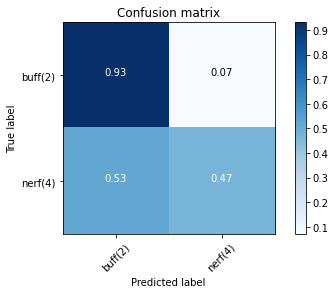

In [160]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['buff(2)','nerf(4)'],normalize= True,  title='Confusion matrix')